In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
import preprocessing.skeletonnormalization as sn
import preprocessing.get_data as gd

In [3]:
train = gd.load_data('../pickle/train.p')
# a08_s01_e01_skeleton_proj.txt         hands raised over head
# a10_s06_e02_skeleton_proj.txt         wave
action_data = train["a08_s01_e01_skeleton_proj.txt"]
print(np.array(action_data).shape)
print(np.array(action_data)[0,:,:].shape) # frame 1

def get_frame(frame, data):
    return np.array(data)[frame - 1,:,1:]

(109, 20, 5)
(20, 5)


In [4]:
# get vector of average joint lengths as r
r = gd.load_data('../pickle/r.p')
# get data from the a frame
frame_data = get_frame(60, action_data)

# normalize raw frame data 
norm_skele = sn.normalize_skeleton(frame_data, r)
# split into xs, ys, zs
xs_norm, ys_norm, zs_norm = norm_skele[:,0], norm_skele[:,1], norm_skele[:,2]
# get non normalized xs, ys, zs
xs, ys, zs = frame_data[:,1], frame_data[:,2], frame_data[:,3]

print(' frame data shape:', frame_data.shape)     
print(' join num| x     | y    |  z\n',frame_data[0])

 frame data shape: (20, 4)
 join num| x     | y    |  z
 [ 1.    -0.081 -0.324  2.403]


In [5]:
# initialize joint colors of skeleton
colors = ['blue' for i in range(20)]
colors[0] = 'red'  # hip is red
colors[7] = 'green'  # hands and feet are green
colors[11] = 'green'
colors[15] = 'green'
colors[19] = 'green'
colors[3] = 'black' # head is black

<IPython.core.display.Javascript object>


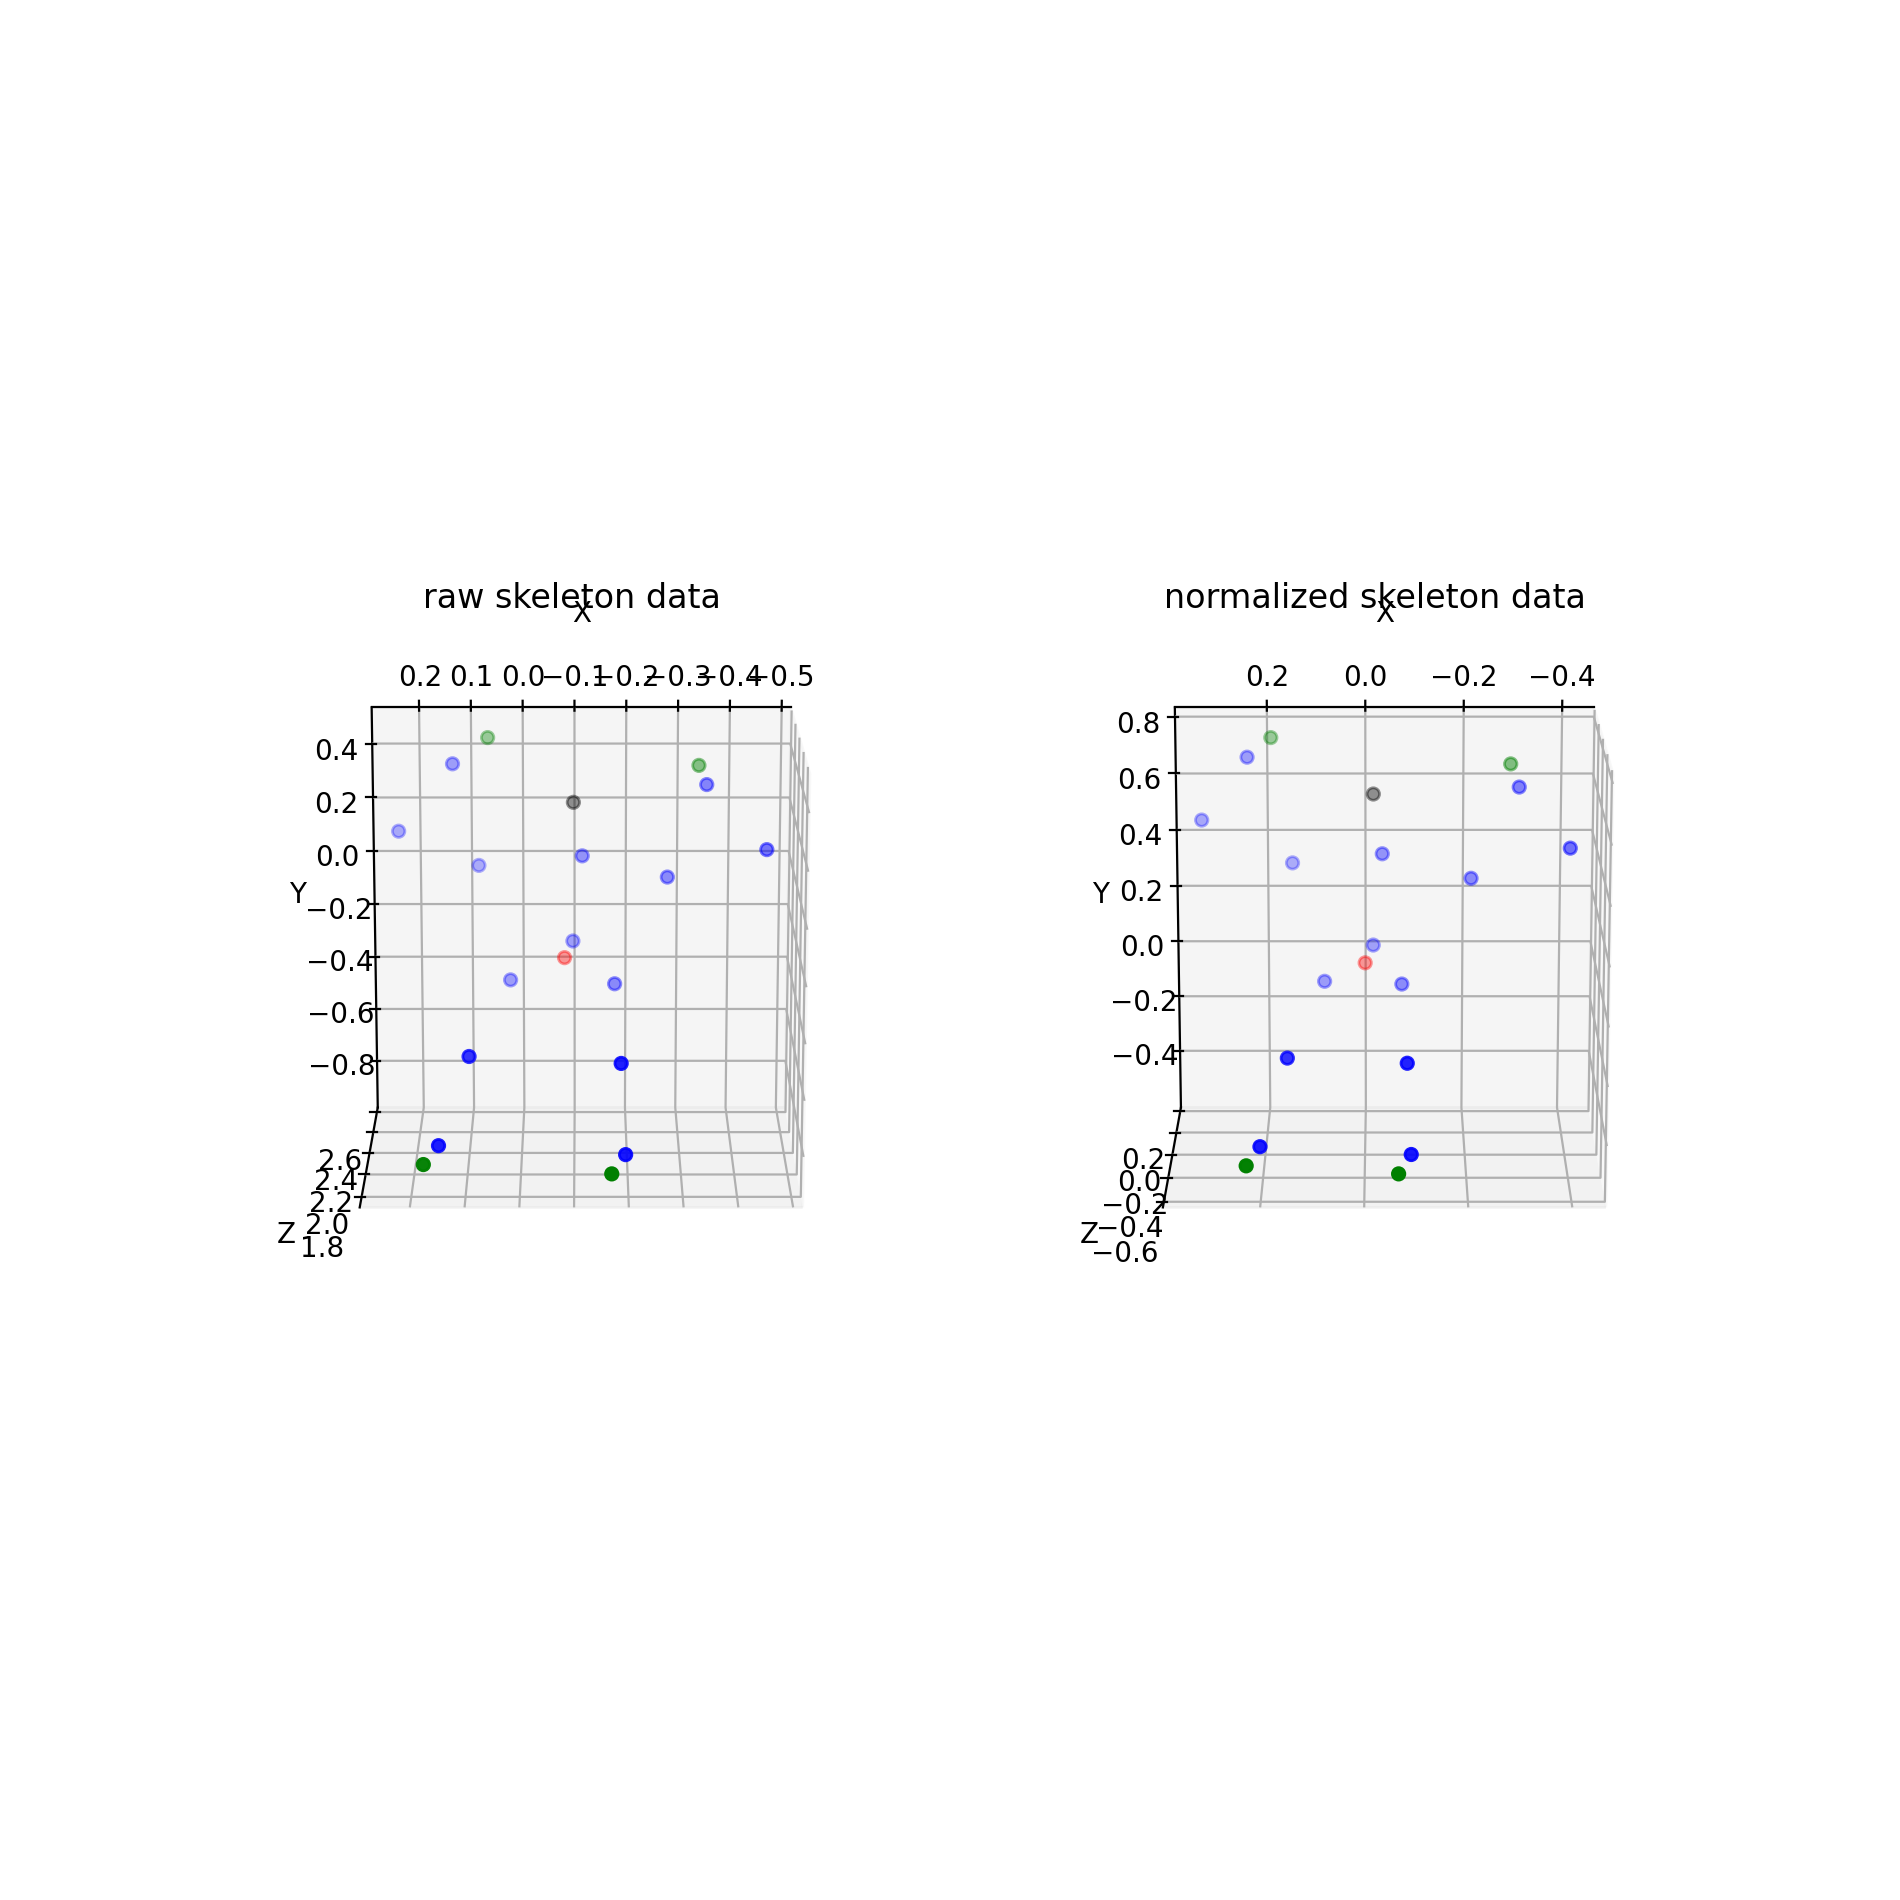

In [6]:
fig = plt.figure()
fig.set_size_inches(9.5, 9.5)

# plot 1 non normalized data
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
scatter_1 = ax.scatter(xs, ys, zs, color=colors, label='Raw Skeleton Data')
ax.view_init(-75,  90)
ax.set_title('raw skeleton data')

# plot 2 normalized skeleton data
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
scatter_2 = ax.scatter(xs_norm, ys_norm, zs_norm, color=colors, label='Normalized Skeleton Data')
ax.view_init(-75,  90)
ax.set_title('normalized skeleton data')

plt.show()